# Bitácora de Laboratorio: Torque Magnético
**Curso:** Laboratorio Intermedio de Física  
**Fecha:** 2025-09-03  
**Integrantes:** Ángela Bustos y  Mariana Montoya. 

---
## Objetivos
- Medir el momento magnético usando métodos estáticos y dinámicos.
- Observar precesión y resonancia magnética.
- Comparar resultados con el modelo teórico.

---
## Marco Teórico (resumen mínimo)
Torque sobre dipolo: $\vec{\tau}=\vec{\mu}\times\vec{B}$.  
Fuerza en campo no uniforme: $\vec{F}=(\vec{\mu}\cdot\nabla)\vec{B}$.  
Pequeñas oscilaciones: $T^2=\dfrac{4\pi^2 I}{\mu B}$.  
Precesión: $\Omega=\dfrac{\mu B}{L_s}$.

---
## Montaje (breve)
Arreglo de bobinas, unidad de control, estroboscopio, bola de resina con imán.


<p align="center">
  <img src="montaje.jpg" alt="Mi imagen" width="600">
</p>

---
## Datos iniciales 

In [10]:
m_bolita = 141.3 #g
m_pesa = 1.5 #g
d_varilla = 9.71 #cm
r_bolita = 4.81/2 #cm
l_manija= 0.82 #cm
g = 9.80665

err_pie_rey = 0.05*10e-3 #mm
err_unidad = 0.5 #Amperes
err_tiempo= 0.01 #segundos
err_pesa = 0.1 #g

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import fit_line


---
## Actividad 1: Equilibrio estático
Relación esperada: $\mu B = rmg + dMg$.  
Ingresar mediciones (m, r, B) para varias posiciones. Calcular $rmg$ y graficar vs. $B$.

C:\Users\user\AppData\Local\Temp\ipykernel_23108\1421055661.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(x_ajuste, y_ajuste,'r-', color= color_n2,  label="Línea de ajuste")


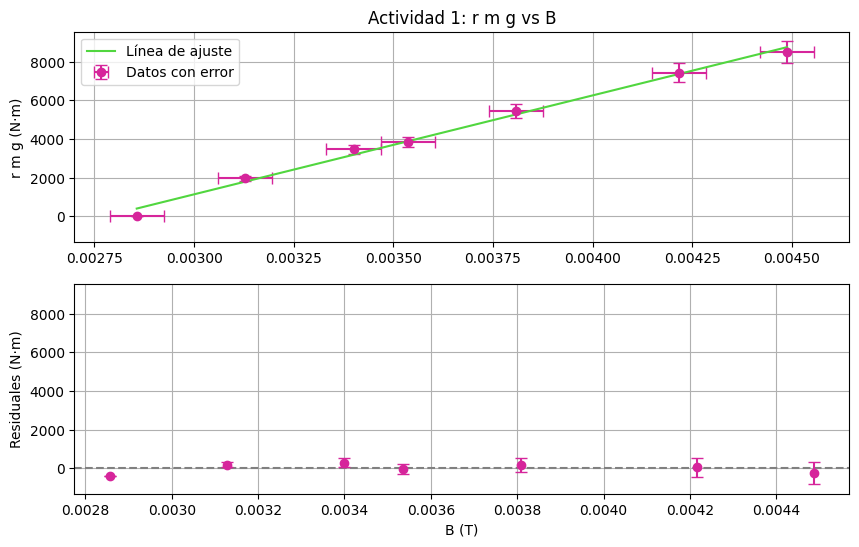

In [20]:
l_peso = np.array([5.04*1e2 ,5.77*1e2 ,1.33*1e2 ,2.35*1e2 ,0,2.62*1e2 ,3.7*1e2 ]) #m
I_palo = np.array([3.1,3.3,2.3,2.5,2.1,2.6,2.8]) #Amperes

#Tomado de la guía y de los valores de las actividades  

k_BI = 1.36e-3   # T/A
B = k_BI * I_palo #T 
err_B= k_BI * err_unidad #T 

y = l_peso * m_pesa * g  
err_y= np.sqrt( (m_pesa*g*err_pie_rey)**2 + (l_peso*g*err_pesa)**2 )  #N·cm teniendo las incertidumbres de l_peso y m_pesa
x = B

#Ajuste líneal 
coef, cov = np.polyfit(B, y, 1, cov=True)
mfit, bfit = coef
smfit, sbfit = np.sqrt(np.diag(cov))

x_ajuste = np.linspace(x.min(), x.max(), 100)
y_ajuste = mfit * x_ajuste + bfit

#Residuales 
residuales = y - (mfit * x + bfit)

#Ploteo 
color_n1 = "#D6259B"  
color_n2 = "#51D63F" 


fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10, 6), sharey=True)
ax1.set_title("Actividad 1: r m g vs B")
ax1.set_ylabel("r m g (N·m)")
ax1.grid()

ax1.errorbar(x, y, color= color_n1, xerr=err_B*10e-2, yerr=err_y, fmt="o", capsize=4, label="Datos con error")
ax1.plot(x_ajuste, y_ajuste,'r-', color= color_n2,  label="Línea de ajuste")
ax1.legend()


ax2.set_xlabel("B (T)")
ax2.set_ylabel("Residuales (N·m)")
ax2.axhline(0, color='gray', linestyle='--')
ax2.errorbar(x, residuales, yerr=err_y, fmt='o', color=color_n1, capsize=4)
ax2.grid()

plt.show()

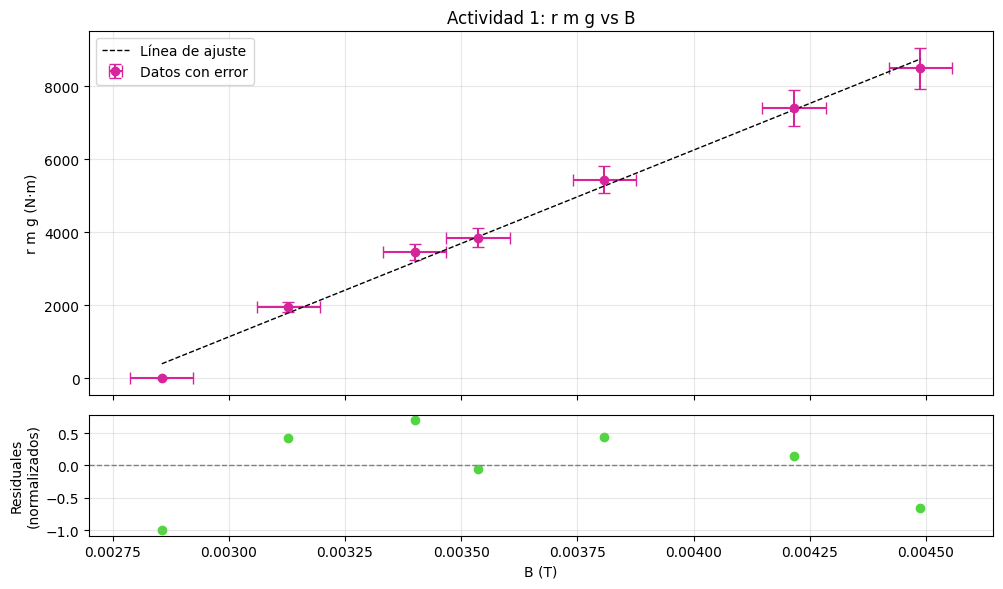

Pendiente = 5.119e+06 ± 1.896e+05
Intercepto = -1.422e+04 ± 6.965e+02


In [30]:
l_peso = np.array([5.04*1e2, 5.77*1e2, 1.33*1e2, 2.35*1e2, 0, 2.62*1e2, 3.7*1e2])  # m
I_palo = np.array([3.1, 3.3, 2.3, 2.5, 2.1, 2.6, 2.8])  # A

k_BI = 1.36e-3   # T/A
B = k_BI * I_palo
x = B

y = l_peso * m_pesa * g
err_y = np.sqrt((m_pesa*g*err_pie_rey)**2 + (l_peso*g*err_pesa)**2)
err_B = k_BI * err_unidad

# --- AJUSTE LINEAL + COVARIANZA ---
coef, cov = np.polyfit(x, y, 1, cov=True)
mfit, bfit = coef
smfit, sbfit = np.sqrt(np.diag(cov))

x_ajuste = np.linspace(x.min(), x.max(), 200)
y_ajuste = mfit * x_ajuste + bfit

# --- RESIDUALES ---
residuales = y - (mfit * x + bfit)


max_abs_res = np.max(np.abs(residuales))
if max_abs_res == 0:
    residuales_norm = np.zeros_like(residuales)
    err_res_norm = np.zeros_like(err_y)
else:
    residuales_norm = residuales / max_abs_res
    err_res_norm = err_y / max_abs_res

# --- PLOTS ---
color_n1 = "#D6259B"
color_n2 = "#51D63F"

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 6), sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)


ax1.set_title("Actividad 1: r m g vs B")
ax1.set_ylabel("r m g (N·m)")
ax1.grid(True, alpha=0.3)

ax1.errorbar(x, y, xerr=err_B*10e-2, yerr=err_y,
             fmt="o", capsize=4, color=color_n1, label="Datos con error")
ax1.plot(x_ajuste, y_ajuste, "--", linewidth=1, color="black", label="Línea de ajuste")
ax1.legend()

ax2.set_xlabel("B (T)")
ax2.set_ylabel("Residuales\n(normalizados)")
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.scatter(x, residuales_norm, color=color_n2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Pendiente = {mfit:.3e} ± {smfit:.3e}")
print(f"Intercepto = {bfit:.3e} ± {sbfit:.3e}")


In [ ]:
print(f"Pendiente = {mfit:.3e} ± {smfit:.3e}")
print(f"Intercepto = {bfit:.3e} ± {sbfit:.3e}")

In [ ]:
I = [1.5,1,1.2,1.3,1.4,1.6,1.15,1.25,1.35,1.45] #Amperes
t = [26.9,30.64,28.69,28.49,27.28,31.40,30.24,29.10,28.02,27.28] #Segundos

10


In [ ]:
f = 3.8 #Hz frecuencia dada por el electrodoscopio
I = [1,1.5,2,2.5,3,3.5,4] # Amperes
T = [10.27, 7.63,4.81, 3.55, 2.51, 1.91, 1.72 ] # segundos 

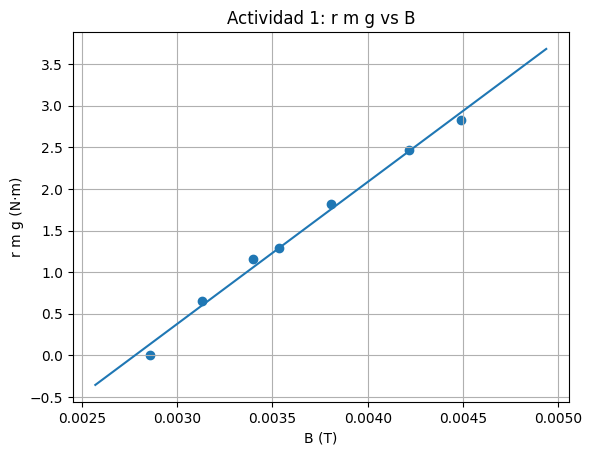

Pendiente = 1.7062e+03 ± 6.3e+01  [N·m/T]  => μ_est = pendiente
Intercepto = -4.741e+00 ± 2.3e-01
μ (Actividad 1) ≈ 1706.2042241015204 A·m^2


El intercepto en el eje y o x teóricamente debería ser 0. un valor distinto de cero indica la presencia de errores sistemáticos en las mediciones.

---
## Actividad 2: Oscilación armónica
Relación esperada: $T^2 = \dfrac{4\pi^2 I}{\mu B}$.  
Graficar $T^2$ vs $1/B$ y ajustar línea: pendiente $=\dfrac{4\pi^2 I}{\mu}$.


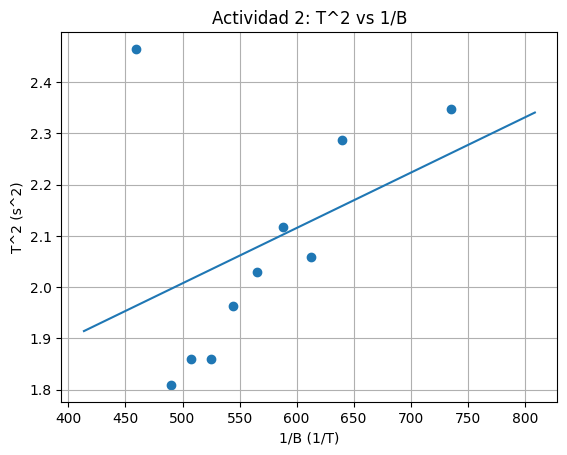

Pendiente = 1.0794e-03 ± 9.0e-04  [s^2·T]
Intercepto = 1.468e+00 ± 5.1e-01  [s^2]
I (momento de inercia) = 326.913093 kg·m^2
μ (Actividad 2) ≈ 1.1957e+07 ± 9.9e+06 A·m^2


In [68]:
# ==== Datos de Actividad 2 (edita con tus medidas) ====
# Corriente (A) y tiempos para 20 oscilaciones (s)
I2 = np.array([1.5,1,1.2,1.3,1.4,1.6,1.15,1.25,1.35,1.45]) #A
t20 = np.array([26.9,30.64,28.69,28.49,27.28,31.40,30.24,29.10,28.02,27.28]) #Segundos
#I2 = np.array([1.0, 1.5, 2.0, 2.5, 3.0])   # A  <-- EDITAR
#t20 = np.array([64.0, 54.0, 48.0, 44.0, 40.0])  # s <-- EDITAR (tiempo de 20 oscilaciones)

B2 = k_BI * I2
T = t20 / 20.0
y = T**2
x = 1.0 / B2

(mfit2, smfit2), (bfit2, sbfit2) = fit_line(x, y)

plt.scatter(x, y)
plt.xlabel("1/B (1/T)")
plt.ylabel("T^2 (s^2)")
plt.title("Actividad 2: T^2 vs 1/B")
plt.grid()
xx = np.linspace(x.min()*0.9, x.max()*1.1, 100)
plt.plot(xx, mfit2*xx + bfit2)
plt.show()

# Momento de inercia (bola maciza)
M_bola =  141.3   # kg  <-- EDITAR
R_bola = 4.81/2  # m   <-- EDITAR
I_mom = (2/5)*M_bola*(R_bola**2)

mu_est_act2 = (4*np.pi**2 * I_mom) / mfit2
# Propagación simple por pend.
dmu2 = mu_est_act2 * (smfit2/abs(mfit2))

print(f"Pendiente = {mfit2:.4e} ± {smfit2:.1e}  [s^2·T]")
print(f"Intercepto = {bfit2:.3e} ± {sbfit2:.1e}  [s^2]")
print("I (momento de inercia) =", I_mom, "kg·m^2")
print("μ (Actividad 2) ≈ {:.4e} ± {:.1e} A·m^2".format(mu_est_act2, dmu2))


---
## Actividad 3: Precesión
Relación esperada: $\Omega = \dfrac{\mu B}{L_s}$.  
Graficar $\Omega$ vs $B$; pendiente $=\mu/L_s$.


Pendiente (μ/Ls) = 1.089494e+04 ± 7.27e+02 [s^-1·T^-1]
Intercepto = -7.298241e-01 ± 1.96e-01 [s^-1]
L_s no definido: sólo podemos reportar μ/L_s (pendiente).


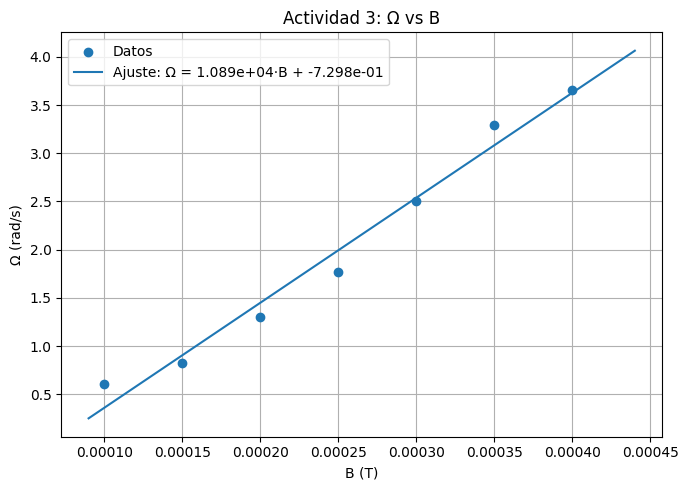

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# --- Datos (usa los tuyos) ---
f = 3.8
I3 = np.array([1,1.5,2,2.5,3,3.5,4])
Tprec = np.array([10.27, 7.63, 4.81, 3.55, 2.51, 1.91, 1.72])

# Constantes a editar:
k_BI = 1e-4   # <-- EDITA: factor que convierte corriente (A) a B (T). Ej: k_BI = μ0*n/2R etc.
L_s = None    # <-- SI LO CONOCES, pon un valor (kg·m^2/s). Si no, déjalo None.

# Cálculos
B3 = k_BI * I3
Omega = 2*np.pi / Tprec  # rad/s

# Ajuste lineal (pendiente m, intercepto b) con covarianza
# y errores (desviaciones estándar) usando np.polyfit con cov=True
p, cov = np.polyfit(B3, Omega, 1, cov=True)
mfit3, bfit3 = p
smfit3 = np.sqrt(cov[0,0])
sbfit3 = np.sqrt(cov[1,1])

# Imprime resultados del ajuste
print(f"Pendiente (μ/Ls) = {mfit3:.6e} ± {smfit3:.2e} [s^-1·T^-1]")
print(f"Intercepto = {bfit3:.6e} ± {sbfit3:.2e} [s^-1]")

# Si conoces L_s, calcula mu y su incertidumbre
if L_s is not None:
    mu_est = mfit3 * L_s
    dmu = smfit3 * L_s
    print(f"μ = {mu_est:.6e} ± {dmu:.2e} A·m^2 (con L_s = {L_s})")
else:
    print("L_s no definido: sólo podemos reportar μ/L_s (pendiente).")

# Graficar
xx = np.linspace(B3.min()*0.9, B3.max()*1.1, 200)
fit_line = mfit3 * xx + bfit3

plt.figure(figsize=(7,5))
plt.scatter(B3, Omega, label="Datos", zorder=5)
plt.plot(xx, fit_line, label=f"Ajuste: Ω = {mfit3:.3e}·B + {bfit3:.3e}", zorder=4)
plt.xlabel("B (T)")
plt.ylabel("Ω (rad/s)")
plt.title("Actividad 3: Ω vs B")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# (Opcional) Si prefieres trazar la 'línea teórica' para un μ supuesto:
# mu_supuesto = 1e-3  # ejemplo
# if L_s is not None:
#     plt.plot(xx, (mu_supuesto/L_s)*xx, '--', label=f"Teórica (μ={mu_supuesto})")




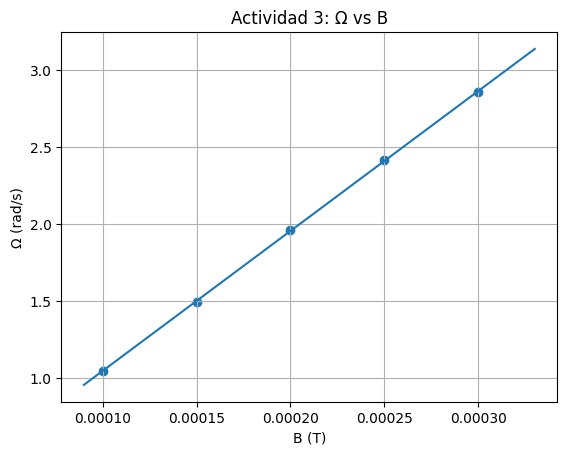

Pendiente = 9.0764e+03 ± 5.2e+01  [s^-1·T^-1]
μ (Actividad 3) ≈ 1.8153e+01 ± 1.0e-01 A·m^2 (con Ls asumido=0.002)


In [79]:
# ==== Datos de Actividad 3 (edita con tus medidas) ====
# Corriente (A) y periodos de precesión (s)
def fit_line(x, y):
    p, cov = np.polyfit(x, y, deg=1, cov=True)
    m, b = p
    sm, sb = np.sqrt(np.diag(cov))
    return (m, sm), (b, sb)
I3 = np.array([1.0, 1.5, 2.0, 2.5, 3.0])  # A  <-- EDITAR
Tprec = np.array([6.0, 4.2, 3.2, 2.6, 2.2])  # s  <-- EDITAR

B3 = k_BI * I3
Omega = 2*np.pi / Tprec  # rad/s

(mfit3, smfit3), (bfit3, sbfit3) = fit_line(B3, Omega)

plt.scatter(B3, Omega)
plt.xlabel("B (T)")
plt.ylabel("Ω (rad/s)")
plt.title("Actividad 3: Ω vs B")
plt.grid()
xx = np.linspace(B3.min()*0.9, B3.max()*1.1, 100)
plt.plot(xx, mfit3*xx + bfit3)
plt.show()

# Si conoces L_s, puedes obtener μ = pendiente * L_s
L_s = 0.002  # kg·m^2/s  <-- EDITAR (momento angular de espín)
mu_est_act3 = mfit3 * L_s
dmu3 = L_s * smfit3

print(f"Pendiente = {mfit3:.4e} ± {smfit3:.1e}  [s^-1·T^-1]")
print("μ (Actividad 3) ≈ {:.4e} ± {:.1e} A·m^2 (con Ls asumido={})".format(mu_est_act3, dmu3, L_s))

---
## Comparación de resultados
Completa con los valores estimados de $\mu$ de cada actividad y discute la compatibilidad.

- Fuentes de error: campo terrestre, fricción, no uniformidad de $B$, lectura del estroboscopio.

- Sugerencias de mitigación: nivelación, repetir medidas, promediar, controlar corrientes externas.
